In [ ]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

sns.set(context='talk', palette='hls')

## Manipulasi dan Deskripsi Data

Hal yang pertama harus dilakukan adalah memuat dataset. Dataset yang digunakan berupa file dengan format csv (comma-separated values).

In [3]:
#connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('../content/drive/My Drive/data set/pokemon.csv')

Hal lain yang biasanya kita lakukan di awal adalah memunculkan *summary statistics*. Meski terkadang bisa mengecoh, tetapi rangkuman yang diberikan tak jarang dapat membantu memahami data dengan lebih baik.

In [5]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Perhatikan bahwa jumlah data (**count**) dalam dataset ini adalah 800. Ini tidak sesuai dengan deskripsi yang diberikan di awal. Hal ini dikarenakan dataset tersebut sebetulnya mengandung bentuk *mega evolution* dan bentuk perubahan lain non-evolusi dari beberapa Pokemon. Kita akan mencoba membuang Pokemon dalam bentuk *mega evolution* untuk sementara waktu.

*Catatan: Lihat kembali materi tentang *masking* dan fungsi lambda untuk memahami baris kode di bawah ini.*

In [6]:
df[df['Name'].apply(lambda x: 'Mega ' in x)].head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False


In [7]:
# Alternatif
df[df['Name'].str.contains('Mega')].head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False


In [8]:
# Membuang Pokemon mega evolution
df = df[~df['Name'].str.contains('Mega')]
df.shape

(751, 13)

Setelah dibuang, ternyata masih ada kelebihan 30 objek dari yang seharusnya tercatat. Perlu kita inspeksi lagi asal kelebihan data ini.

In [9]:
df[730:]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
778,708,Phantump,Ghost,Grass,309,43,70,48,50,60,38,6,False
779,709,Trevenant,Ghost,Grass,474,85,110,76,65,82,56,6,False
780,710,PumpkabooAverage Size,Ghost,Grass,335,49,66,70,44,55,51,6,False
781,710,PumpkabooSmall Size,Ghost,Grass,335,44,66,70,44,55,56,6,False
782,710,PumpkabooLarge Size,Ghost,Grass,335,54,66,70,44,55,46,6,False
783,710,PumpkabooSuper Size,Ghost,Grass,335,59,66,70,44,55,41,6,False
784,711,GourgeistAverage Size,Ghost,Grass,494,65,90,122,58,75,84,6,False
785,711,GourgeistSmall Size,Ghost,Grass,494,55,85,122,58,75,99,6,False
786,711,GourgeistLarge Size,Ghost,Grass,494,75,95,122,58,75,69,6,False
787,711,GourgeistSuper Size,Ghost,Grass,494,85,100,122,58,75,54,6,False


Perhatikan bahwa pada Pokemon generasi lanjut ada Pokemon dengan nomor ('#') sama dalam berbagai bentuk, misalnya Pumpkaboo (710) dan Gourgeist (711) pada generasi 6. Untuk memudahkan, kita akan mengambil Pokemon dari tiga generasi pertama saja. Selain itu, kita akan membuang bentuk alternatif dari beberapa Pokemon di generasi ketiga.

In [10]:
poke3 = df[df['Generation'].isin([1,2,3])] # Mengambil Pokemon dari tiga generasi pertama
poke3 = poke3.drop([422,424,429,430,431]) # Membuang beberapa Pokemon dalam bentuk lain
poke3.shape

(385, 13)

Siapa yang menjadi Pokemon terkuat dan terlemah dari tiga generasi pertama? Kita akan mencoba melihat ini dengan menggunakan nilai total atributnya.

In [11]:
poke3[poke3['Total'] == poke3['Total'].max()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
269,249,Lugia,Psychic,Flying,680,106,90,130,90,154,110,2,True
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True
425,384,Rayquaza,Dragon,Flying,680,105,150,90,150,90,95,3,True


In [12]:
poke3[poke3['Total'] == poke3['Total'].min()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
206,191,Sunkern,Grass,NaN,180,30,30,30,30,30,30,2,False


Ada empat Pokemon legendaris yang menjadi Pokemon terkuat dari tiga generasi pertama. Untuk itu, kita akan mencoba mengeksplorasi lebih jauh dengan melihat agregat data untuk perbandingan Pokemon legendaris dan Pokemon biasa. Pertama, berapa jumlah Pokemon legendaris dari tiga generasi pertama? Apa saja tipe 1 mereka? Lalu, apakah rata-rata HP Pokemon legendaris lebih besar?

In [13]:
len(poke3[poke3['Legendary']])

19

In [14]:
poke3[poke3['Legendary']]['Type 1'].value_counts()

Fire        3
Psychic     3
Dragon      3
Ice         2
Steel       2
Water       2
Electric    2
Ground      1
Rock        1
Name: Type 1, dtype: int64

In [15]:
poke3.groupby('Legendary')['HP'].agg(['mean','median','std'])

,mean,median,std
Legendary,,,
False,64.86612,60,28.106863
True,92.00000,90,14.985178


Faktanya, tiga tipe 1 terbanyak dari Pokemon legendaris adalah *dragon*, *psychic*, dan *fire*. Sementara itu, secara rata-rata dan mediannya atribut HP Pokemon legendaris memang cenderung lebih tinggi. Ini mungkin karena beberapa Pokemon biasa masih merupakan bentuk awal (masih bisa berevolusi) sehingga wajar jika rata-rata HP Pokemon biasa lebih rendah dibandingkan Pokemon legendaris.

## Visualisasi Data

Untuk tahu lebih pasti, kita dapat menggambarkan nilai total atribut untuk mengetahui perbedaan distribusi Pokemon legendaris dan biasa. Hal ini bisa dilakukan dengan membuat histogram.

In [16]:
plt.rcParams['figure.figsize'] = (10,7)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


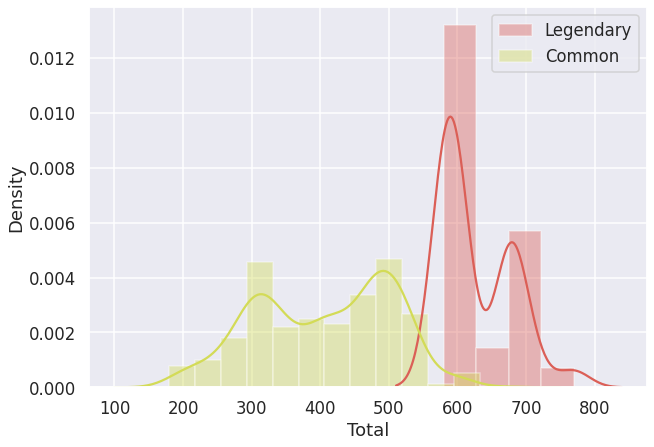

In [17]:
sns.distplot(df[df['Legendary'] == True]['Total'], label='Legendary')
sns.distplot(df[df['Legendary'] == False]['Total'], label='Common')
plt.ylabel('Density')
plt.legend()
plt.show()

Dari histogram tersebut, dapat terlihat bahwa ada perbedaan yang cukup jelas antara Pokemon biasa dengan legendaris. Perbedaan tersebut mulai terlihat batasnya di sekitar nilai total 550. Sebagai perbandingan, di bawah ini digambarkan histogram nilai total atribut untuk seluruh Pokemon yang ada. Distribusi dengan dua puncak seperti ini biasa disebut juga dengan distribusi bimodal (= dua modus). Apa yang kira-kira bisa menyebabkan distribusinya seperti itu?

*Bagi yang penasaran: Kurva tegas yang ada pada grafik merupakan nilai *probability density* dari metode [Kernel Density Estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation).*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


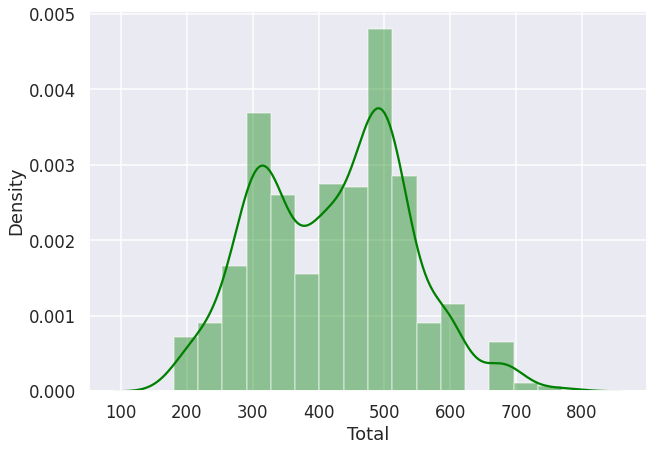

In [18]:
sns.distplot(df['Total'], color='g')
plt.ylabel('Density')
plt.show()

Kita dapat mengeksplorasi lebih lanjut dengan melihat Pokemon dengan atribut yang memiliki pencilan (*outliers*). Untuk memudahkan tugas ini, kita dapat menggunakan *box plot*.

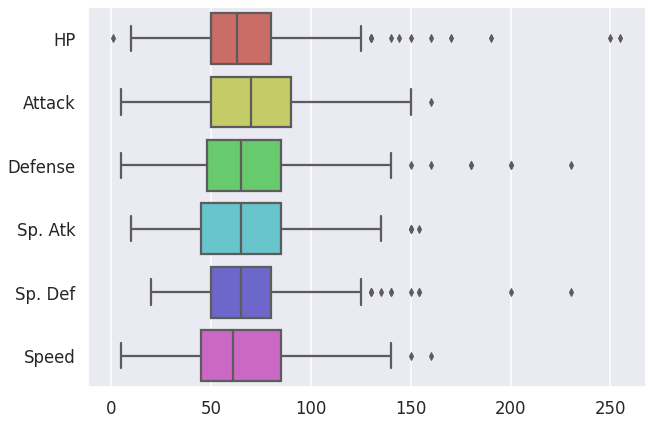

In [19]:
sns.boxplot(data=poke3[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']], orient='h');

Titik-titik pada *box plot* merupakan kemungkinan nilai-nilai pencilan, sementara garis di tengah-tengah kotak merupakan nilai median. Anda dapat membaca lebih lanjut tentang *box plot* di [sini](http://www.physics.csbsju.edu/stats/box2.html). Dari grafik tersebut, kira-kira siapa saja Pokemon dengan nilai HP, Defense, dan Sp. Def yang menjadi pencilan tersebut?

In [20]:
poke3[(poke3['HP'] > 180) | (poke3['Defense'] > 180) | (poke3['Sp. Def'] > 180)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False
217,202,Wobbuffet,Psychic,NaN,405,190,33,58,33,58,33,2,False
223,208,Steelix,Steel,Ground,510,75,85,200,55,65,30,2,False
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False
414,377,Regirock,Rock,NaN,580,80,100,200,50,100,50,3,True
415,378,Regice,Ice,NaN,580,80,50,100,100,200,50,3,True


Ternyata, hanya ada dua Pokemon legendaris dengan atribut yang bernilai ekstrem! Artinya, Pokemon legendaris yang lain masih punya kemungkinan untuk dikalahkan dengan Pokemon biasa yang kita latih.

Sekarang, kita ingin menganalisis lebih jauh tentang berbagai atribut yang lain. Pertama, kita akan mencari tahu berapa jumlah Pokemon berdasarkan masing-masing tipe pertamanya. Kita dapat memvisualisasikan ini dengan menggunakan diagram batang (*bar plot*). Kita akan menggunakan pustaka seaborn untuk melakukan hal ini.

*Catatan: Perhatikan bahwa diagram batang ini akan sedikit berbeda dengan histogram yang dijelaskan sebelumnya.*

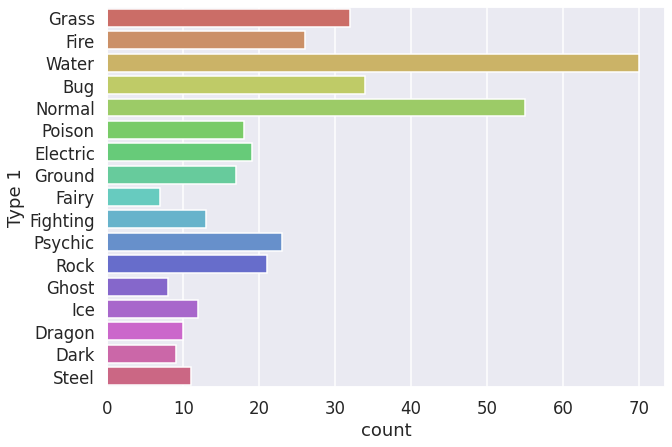

In [21]:
sns.countplot(y='Type 1', data=poke3, palette='hls');

Kita juga dapat melihat perubahan jumlah Pokemon per tipe untuk tiap generasi. Kita dapat membuat *pivot table* seperti dengan kode di bawah ini sebelum digambarkan dengan diagram garis (*line plot*).

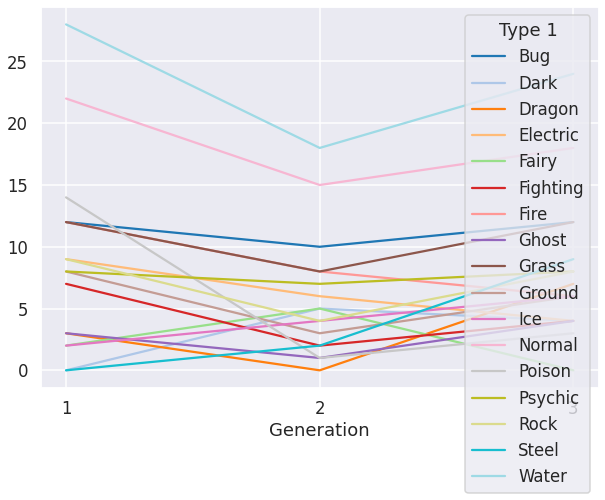

In [22]:
pv = pd.pivot_table(poke3, values='#', index=['Generation'], columns=['Type 1'], aggfunc='count').fillna(0)
ax = pv.plot.line(cmap='tab20')
ax.set_xticks([1,2,3]);

Diagram di atas menunjukkan bahwa tipe 1 terbanyak untuk Pokemon dari tiga generasi pertama adalah *water*. Bagaimana dengan tipe 2?

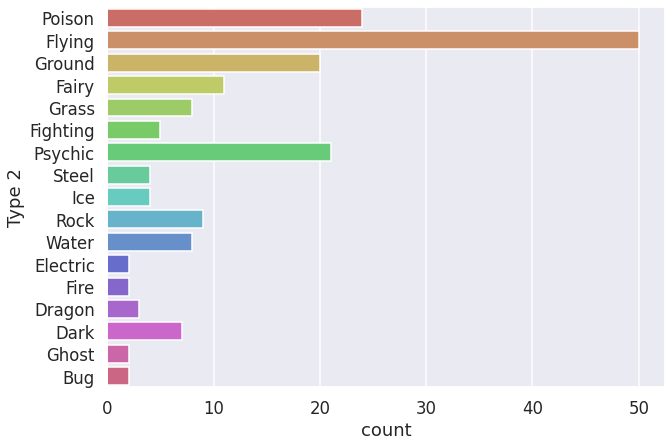

In [23]:
sns.countplot(y='Type 2', data=poke3, palette='hls');

Dapat dilihat bahwa tipe 2 didominasi oleh Flying yang bahkan tidak termasuk dalam tipe 1. Jadi, dapat kita ambil kesimpulan sementara bahwa mempunyai Pokemon tipe *ice*, *electric*, atau *rock* (yang efektif untuk menghadapi Pokemon tipe *flying*) dalam tim merupakan solusi yang cukup efektif karena peluang untuk menemukan Pokemon dengan tipe *flying* cukup besar.

Meski demikian, sebetulnya tipe Pokemon yang menjadi pilihan awal (*starter Pokemon*) hampir selalu terdiri dari tiga pilihan tipe 1: *fire*, *water*, dan *grass*. Untuk itu, kita akan mencoba mengeksplorasi perbandingan masing-masing atribut untuk ketiga tipe ini. Dengan mengetahui bahwa Pokemon dengan tipe 1 *water* paling banyak, permainannya bisa jadi tidak seimbang jika Pokemon dengan tipe ini juga jadi yang terkuat.

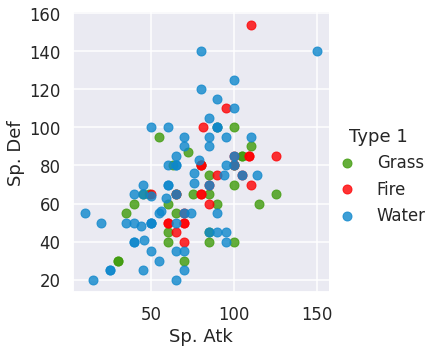

In [24]:
colors = ['grass green', 'fire engine red', 'water blue'] # Hanya digunakan untuk mengganti palet warna
sns.lmplot(
    x='Sp. Atk', y='Sp. Def', hue='Type 1',
    data=poke3[poke3['Type 1'].isin(['Fire', 'Water', 'Grass'])],
    palette=sns.xkcd_palette(colors),
    fit_reg=False
);

Dari *scatter plot* tersebut, dapat dilihat bahwa secara umum kekuatan ketiga jenis Pokemon dari atribut Sp. Atk dan Sp. Def tersebar merata. Hanya ada dua Pokemon yang terlihat sebagai pencilannya dengan Sp. Atk dan Sp. Def yang tinggi. Siapa mereka?

In [25]:
poke3[((poke3['Sp. Atk'] > 140) & (poke3['Type 1'] == 'Water')) | ((poke3['Sp. Def'] > 140) & (poke3['Type 1'] == 'Fire'))]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True
421,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True


*Tentu saja*. Keduanya adalah Pokemon legendaris.

Sekarang, mari kita mengeksplorasi Pokemon dengan tipe 1 terbanyak kedua: *normal*. Karena Pokemon jenis ini lemah terhadap serangan fisik dari Pokemon bertipe *fighting*, maka kita akan menginvestigasi distribusi nilai Attack dari Pokemon *fighting* jika dibandingkan dengan nilai Defense dari Pokemon *normal*.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


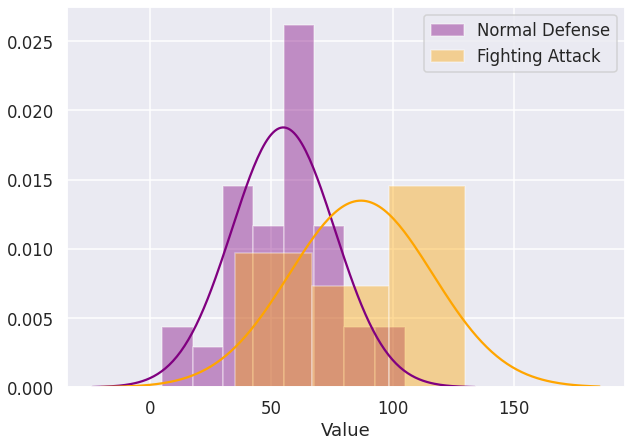

In [26]:
sns.distplot(poke3[poke3['Type 1'] == 'Normal']['Defense'], kde=False, fit=norm, fit_kws={'color': 'purple'}, label='Normal Defense', color='purple')
sns.distplot(poke3[poke3['Type 1'] == 'Fighting']['Attack'], kde=False, fit=norm, fit_kws={'color': 'orange'}, label='Fighting Attack', color='orange')
plt.xlabel('Value')
plt.legend()
plt.show()

Kali ini, alih-alih menggunakan Kernel Density Estimation, kita menggunakan distribusi normal/Gaussian untuk mencocokkan distribusi dari atributnya. Dalam grafik di atas dapat dilihat bahwa nilai rata-rata Attack dari Pokemon *fighting* lebih tinggi dibandingkan nilai rata-rata Defense dari Pokemon *normal*. Jadi, memilih Pokemon *normal* dalam tim mungkin bukan keputusan yang bijak.

Pertanyaan berikutnya: Bagaimana sebetulnya korelasi antaratribut dari Pokemon yang ada? Apakah Pokemon dengan Attack tinggi akan selalu punya Sp. Atk tinggi? Bagaimana hubungannya dengan Speed?

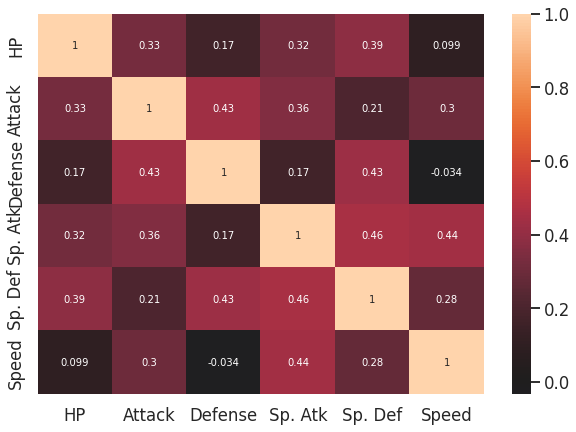

In [27]:
sns.heatmap(
    poke3[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].corr(),
    annot=True,
    center=0,
);

Dari *heatmap* di atas, ternyata korelasi yang paling tinggi adalah antara Sp. Atk dengan Sp. Def. Sementara itu, beberapa atribut lain yang juga berkorelasi dengan cukup kuat adalah Sp. Atk dengan Speed, Attack dengan Defense, dan Sp. Def dengan Defense. Di sisi lain, Defense tidak terlihat berkorelasi kuat dengan Speed.